<a href="https://colab.research.google.com/github/octaviobuttera/free-or-occupied-docks/blob/main/script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TRABAJO DE APLICACIÓN

##Integrantes:
* Buttera, Octavio
* Bode, Ignacio

In [ ]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0] / OpenCV version 4.11.0 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#IMPLEMENTACION 1 - POSICION 4 - 4PTOS X DARSENA

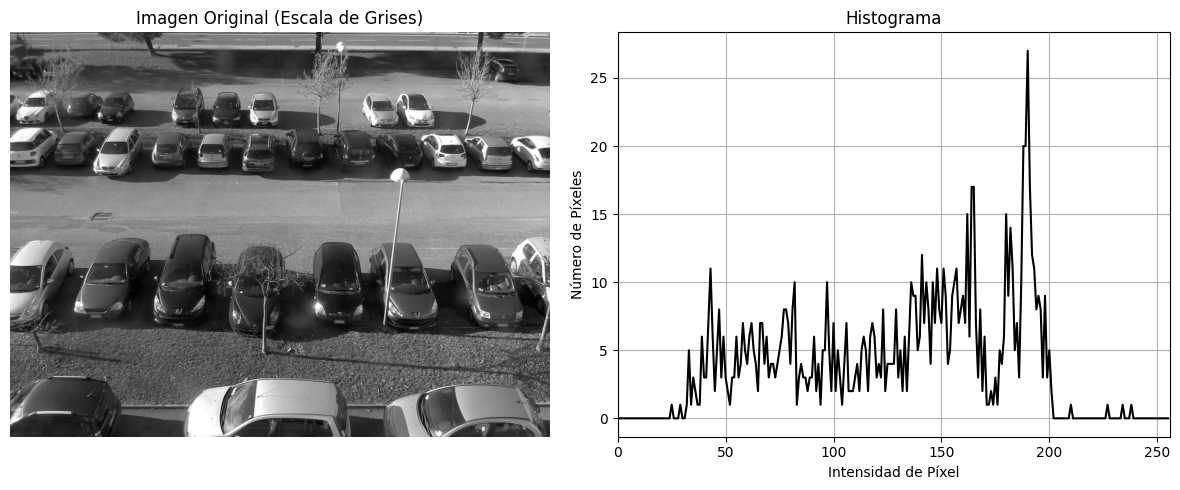

Dársena 1 → media: 101.04 | desvío: 64.43
Dársena 2 → media: 55.38 | desvío: 37.31
Dársena 3 → media: 114.94 | desvío: 80.96
Dársena 4 → media: 64.79 | desvío: 50.27
Dársena 5 → media: 92.46 | desvío: 64.59
Dársena 6 → media: 67.80 | desvío: 53.32
Dársena 7 → media: 38.87 | desvío: 34.57
Dársena 8 → media: 64.31 | desvío: 39.52
Dársena 9 → media: 73.41 | desvío: 72.80
Dársena 10 → media: 115.41 | desvío: 76.76
Dársena 11 → media: 114.43 | desvío: 72.24
Dársena 12 → media: 102.64 | desvío: 75.12
Dársena 13 → media: 73.58 | desvío: 53.35
Dársena 14 → media: 53.49 | desvío: 51.89
Dársena 15 → media: 76.93 | desvío: 50.52
Dársena 16 → media: 66.76 | desvío: 60.19
Dársena 17 → media: 90.21 | desvío: 63.73
Dársena 18 → media: 95.11 | desvío: 71.82


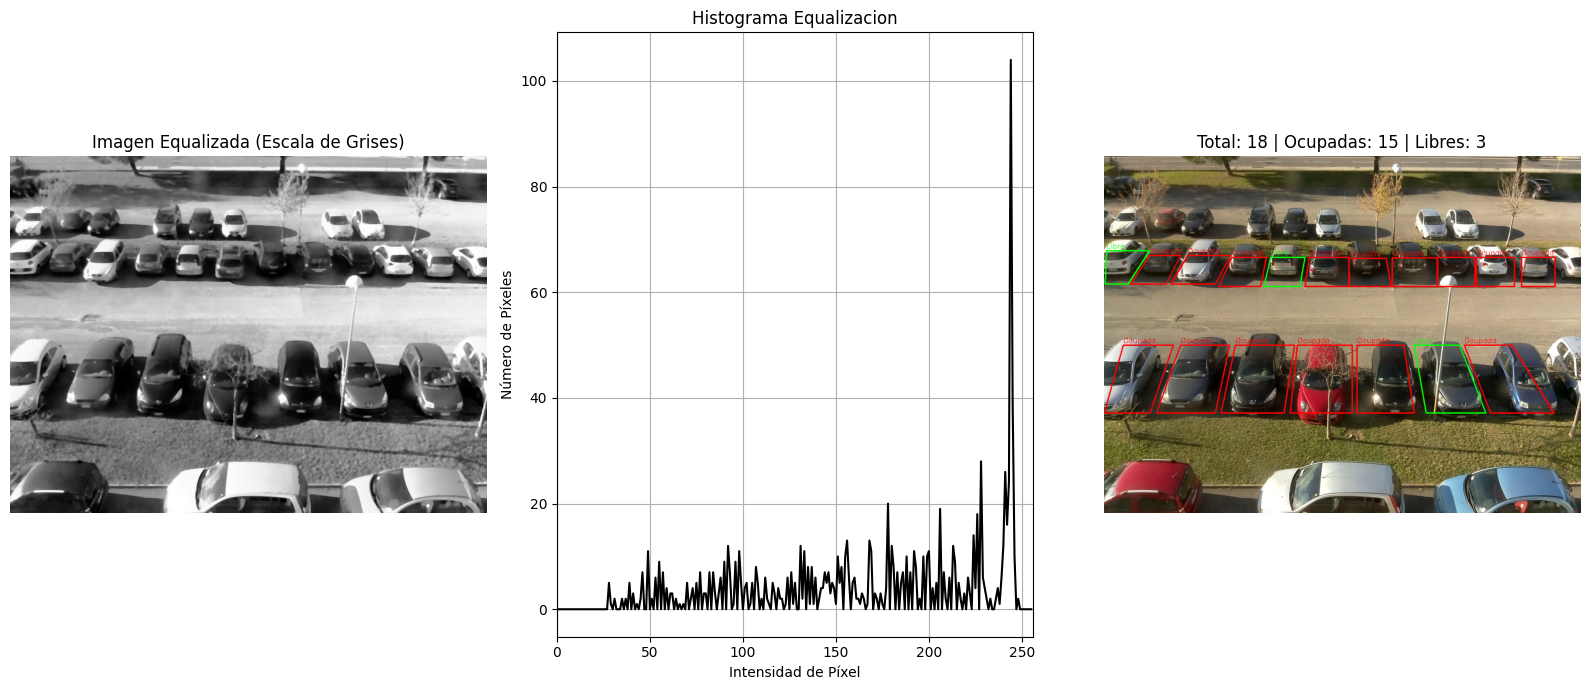

In [ ]:
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0829.jpg') #VACIO
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0930.jpg') #MEDIO LLENO
estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_1001.jpg') #LLENO


estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2GRAY)

histograma = cv.calcHist(estacionamiento, [0], None, [256], [0, 256])



#muestro la imagen
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(estacionamiento, cmap='gray')
plt.title('Imagen Original (Escala de Grises)')
plt.axis('off')

#muestro el histograma
plt.subplot(1, 2, 2) # 1
plt.plot(histograma, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Número de Píxeles')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()


#hago una ecualizacion del histograma
estacionamiento_eq = cv.equalizeHist(estacionamiento)


#----------------------- FILTRADO ------------------------
estacionamiento_eq = cv.medianBlur(estacionamiento_eq,5)
#estacionamiento_eq = cv.blur(estacionamiento_eq,(7,7))

#-------------------------------------------------------------------------------


histograma_eq = cv.calcHist(estacionamiento_eq, [0], None, [256], [0, 256])


# Coordenadas de las dársenas
darsenas = [
    ((5, 200),(95,200),(50, 270), (2,270)),
    ((95, 210), (160, 210), (130, 270), (55, 270)),
    ((175, 210),(265, 210), (233,270), (140, 270)),
    ((268, 214),(340, 214), (328,275), (240,275)),
     ((349, 214), (421, 214), (410, 275), (335, 275)),  # Dársena 5
    ((430, 214), (513, 214), (513, 275), (421, 275)),  # Dársena 6
    ((513, 216), (591, 216), (602, 275), (514, 275)),  # Dársena 7
    ((604, 215), (698, 215), (698, 275), (604, 275)),  # Dársena 8
    ((699, 214), (777, 214), (777, 275), (699, 275)),  # Dársena 9
    ((780, 214), (860, 214), (860, 275), (780, 275)),  # Dársena 10
    ((875, 214), (945, 214), (945, 275), (875, 275)),   # Dársena 11 #antes estaba (875, 204), (945, 270)

    #parte de abajo
    ((40, 398),(145, 398), (96,540), (0, 540)),
    ((160, 398), (263, 398), (233,540), (110, 540)),
    ((275,398), (399, 398), (377,540), (245, 540)),
    ((405, 398),(520, 398), (520, 540), (390, 540)),
    ((530, 398), (628, 398),(650, 540), (530, 540)),
    ((650, 398),(745, 398), (800, 540), (675, 540)),
    ((755, 398),(855, 398), (943, 540), (810, 540))

]

# Copia para dibujar resultados
resultado = estacionamiento_color.copy()

# Umbral de decision (ajustable)
umbral_ocupacion = 82 #PROBAR CON 120

# Contadores
ocupadas = 0
libres = 0

for i, darsena in enumerate(darsenas):
    # Crear máscara para el polígono
    mask = np.zeros(estacionamiento_eq.shape, dtype=np.uint8)
    pts = np.array([darsena], dtype=np.int32)
    cv.fillPoly(mask, pts, 255)

    # Aplicar máscara
    recorte = cv.bitwise_and(estacionamiento_eq, estacionamiento_eq, mask=mask)

    # Calcular estadísticas solo en zona útil
    valores = recorte[mask == 255]
    media = np.mean(valores)
    s = np.std(valores)

    print(f"Dársena {i+1} → media: {media:.2f} | desvío: {s:.2f}")

       # Decisión: ocupada o libre
    if media < umbral_ocupacion:
        color = (255, 0, 0)  # Rojo (ocupada)
        ocupadas += 1
        estado = "Ocupada"
    else:
      if media >= 82 and media <= 90:
        #es porq es sombra, entonces va como libre
        color = (0, 255, 0)  # Verde (libre)
        libres += 1
        estado = "Libre"
        ocupadas -= 1
      else:
          if s > 63:
            color = (255, 0, 0)  # Rojo (ocupada)
            ocupadas += 1
            estado = "Ocupada"
          else:
              color = (0, 255, 0)  # Verde (libre)
              libres += 1
              estado = "Libre"

    #VER ESTO QUE AGREGUE, CREO QUE TINEE SENTIDO YA QUE BAJO LOS FALSOS OCUPADOS POR SOMBRA


    # Dibujar polígono y texto
    cv.polylines(resultado, [pts], isClosed=True, color=color, thickness=2)
    x_text, y_text = darsena[0]
    cv.putText(resultado, estado, (x_text, y_text - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

total = ocupadas + libres

#muestro la imagen
plt.figure(figsize=(16, 7))
plt.subplot(1, 3, 1)
plt.imshow(estacionamiento_eq, cmap='gray')
plt.title('Imagen Equalizada (Escala de Grises)')
plt.axis('off')

#muestro el histograma
plt.subplot(1, 3, 2) # 1
plt.plot(histograma_eq, color='black')
plt.title('Histograma Equalizacion')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Número de Píxeles')
plt.xlim([0, 256])
plt.grid(True)



# Mostrar imagen final
plt.subplot(1,3,3)
plt.imshow(resultado)
plt.title(f'Total: {total} | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.tight_layout()
plt.show()


#-------------------------------------------------Analisis 2: utilizando media y desvio estándar------------------------------------------


#IMPLEMENTACION 1 - POSICIÓN 4

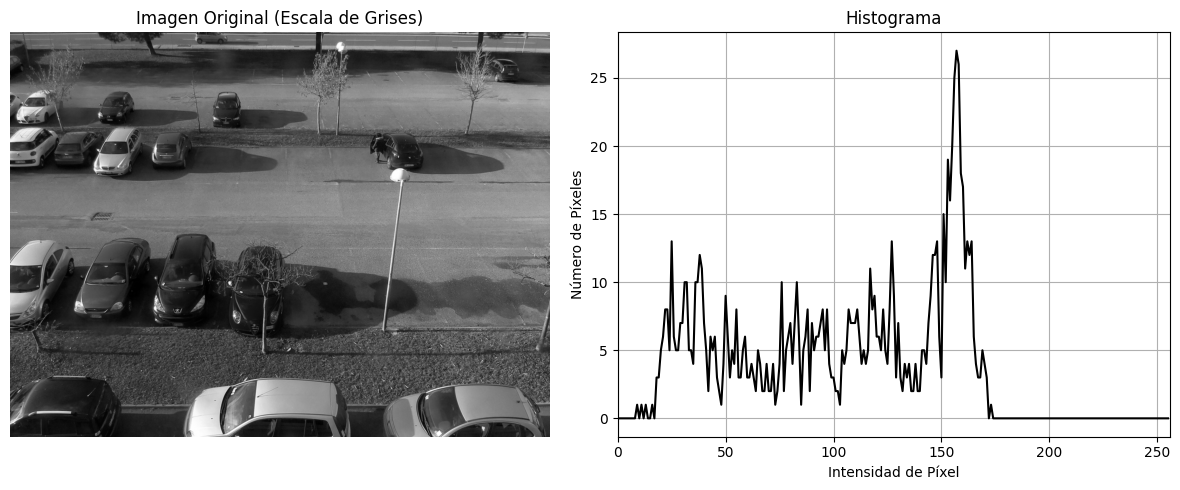

Dársena 1 → media: 115.99 | desvío: 86.34
Dársena 2 → media: 56.34 | desvío: 49.18
Dársena 3 → media: 131.65 | desvío: 87.89
Dársena 4 → media: 70.12 | desvío: 50.04
Dársena 5 → media: 94.32 | desvío: 47.08
Dársena 6 → media: 138.97 | desvío: 38.40
Dársena 7 → media: 172.14 | desvío: 16.19
Dársena 8 → media: 161.81 | desvío: 36.97
Dársena 9 → media: 106.82 | desvío: 84.08
Dársena 10 → media: 119.28 | desvío: 57.26
Dársena 11 → media: 183.06 | desvío: 46.36
Dársena 12 → media: 115.53 | desvío: 90.22
Dársena 13 → media: 68.04 | desvío: 47.49
Dársena 14 → media: 41.49 | desvío: 41.97
Dársena 15 → media: 56.42 | desvío: 44.99
Dársena 16 → media: 83.47 | desvío: 66.44
Dársena 17 → media: 134.98 | desvío: 65.24
Dársena 18 → media: 154.69 | desvío: 41.95


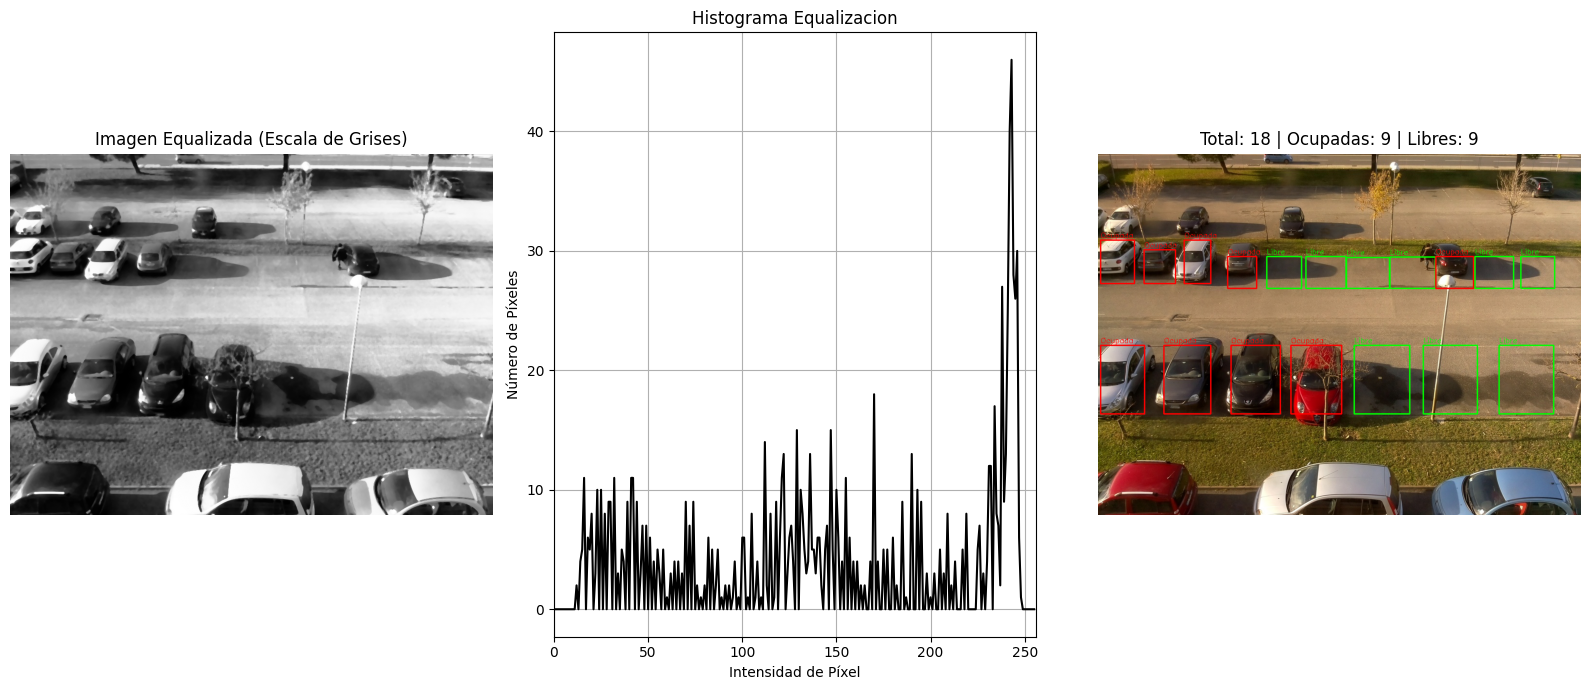

In [ ]:
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0829.jpg') #VACIO
estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0930.jpg') #MEDIO LLENO
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_1001.jpg') #LLENO

estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2GRAY)

histograma = cv.calcHist(estacionamiento, [0], None, [256], [0, 256])



#muestro la imagen
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(estacionamiento, cmap='gray')
plt.title('Imagen Original (Escala de Grises)')
plt.axis('off')

#muestro el histograma
plt.subplot(1, 2, 2) # 1
plt.plot(histograma, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Número de Píxeles')
plt.xlim([0, 256])
plt.grid(True)

plt.tight_layout()
plt.show()


#hago una ecualizacion del histograma
estacionamiento_eq = cv.equalizeHist(estacionamiento)


#----------------------- FILTRADO ------------------------
estacionamiento_eq = cv.medianBlur(estacionamiento_eq,5)
#estacionamiento_eq = cv.blur(estacionamiento_eq,(7,7))

#-------------------------------------------------------------------------------


histograma_eq = cv.calcHist(estacionamiento_eq, [0], None, [256], [0, 256])


# Coordenadas de las dársenas
darsenas = [
    ((5, 180), (75, 270)),
    ((95, 200), (160, 270)),
    ((178, 180), (233,270)),
    ((268, 214), (328,280)),
    ((349, 214), (421, 280)),
    ((430, 214), (513, 280)),
    ((514, 216), (603, 280)),
    ((604, 215), (698, 280)),
    ((699, 214), (777, 280)),
    ((780, 214), (860, 280)),
    ((875, 214), (945, 280)), #antes estaba (875, 204), (945, 270)

    #parte de abajo
    ((5, 398), (96,540)),
    ((136, 398), (233,540)),
    ((275,398), (377,540)),
    ((399, 398), (504, 540)),
    ((530, 398), (645, 540)),
    ((673, 398), (785, 540)),
    ((830, 398), (943, 540))

]

# Copia para dibujar resultados
resultado = estacionamiento_color.copy()

# Umbral de decision (ajustable)
umbral_ocupacion = 110 #PROBAR CON 120

# Contadores
ocupadas = 0
libres = 0

# Proceso por darsena
for i, ((x1, y1), (x2, y2)) in enumerate(darsenas):
    recorte = estacionamiento_eq[y1:y2, x1:x2]
    media = np.mean(recorte)
    s = np.std(recorte)
    print(f"Dársena {i+1} → media: {media:.2f} | desvío: {s:.2f}")

    # Decisión: ocupada o libre
    if media < umbral_ocupacion:
        color = (255, 0, 0)  # Rojo (ocupada)
        ocupadas += 1
        estado = "Ocupada"
    else:
        if media > umbral_ocupacion:
          if s > 70:
            color = (255, 0, 0)  # Rojo (ocupada)
            ocupadas += 1
            estado = "Ocupada"
          else:
              color = (0, 255, 0)  # Verde (libre)
              libres += 1
              estado = "Libre"

    #VER ESTO QUE AGREGUE, CREO QUE TINEE SENTIDO YA QUE BAJO LOS FALSOS OCUPADOS POR SOMBRA
    if media >= 82 and media <= 95:
      #es porq es sombra, entonces va como libre
      color = (0, 255, 0)  # Verde (libre)
      libres += 1
      estado = "Libre"
      ocupadas -= 1


    # Dibujamos rectangulo y texto
    cv.rectangle(resultado, (x1, y1), (x2, y2), color, 2)
    cv.putText(resultado, estado, (x1, y1 - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

total = ocupadas + libres


#muestro la imagen
plt.figure(figsize=(16, 7))
plt.subplot(1, 3, 1)
plt.imshow(estacionamiento_eq, cmap='gray')
plt.title('Imagen Equalizada (Escala de Grises)')
plt.axis('off')

#muestro el histograma
plt.subplot(1, 3, 2) # 1
plt.plot(histograma_eq, color='black')
plt.title('Histograma Equalizacion')
plt.xlabel('Intensidad de Píxel')
plt.ylabel('Número de Píxeles')
plt.xlim([0, 256])
plt.grid(True)



# Mostrar imagen final
plt.subplot(1,3,3)
plt.imshow(resultado)
plt.title(f'Total: {total} | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.tight_layout()
plt.show()

# POSICION 4 - DESCRIPTORES DE TEXTURA

Dársena 1 → media: 148.99 | desvío: 94.26
Dársena 1 → Homogeneidad: 0.824 → Ocupada
Dársena 2 → media: 115.48 | desvío: 23.99
Dársena 2 → Homogeneidad: 0.901 → Libre
Dársena 3 → media: 145.70 | desvío: 88.78
Dársena 3 → Homogeneidad: 0.787 → Ocupada
Dársena 4 → media: 136.70 | desvío: 18.55
Dársena 4 → Homogeneidad: 0.904 → Libre
Dársena 5 → media: 156.75 | desvío: 15.47
Dársena 5 → Homogeneidad: 0.917 → Libre
Dársena 6 → media: 166.89 | desvío: 15.26
Dársena 6 → Homogeneidad: 0.921 → Libre
Dársena 7 → media: 174.82 | desvío: 17.99
Dársena 7 → Homogeneidad: 0.890 → Libre
Dársena 8 → media: 173.75 | desvío: 20.31
Dársena 8 → Homogeneidad: 0.929 → Libre
Dársena 9 → media: 194.60 | desvío: 33.10
Dársena 9 → Homogeneidad: 0.959 → Libre
Dársena 10 → media: 192.37 | desvío: 22.00
Dársena 10 → Homogeneidad: 0.957 → Libre
Dársena 11 → media: 197.81 | desvío: 24.59
Dársena 11 → Homogeneidad: 0.955 → Libre
Dársena 12 → media: 130.43 | desvío: 31.50
Dársena 12 → Homogeneidad: 0.894 → Libre
Dársen

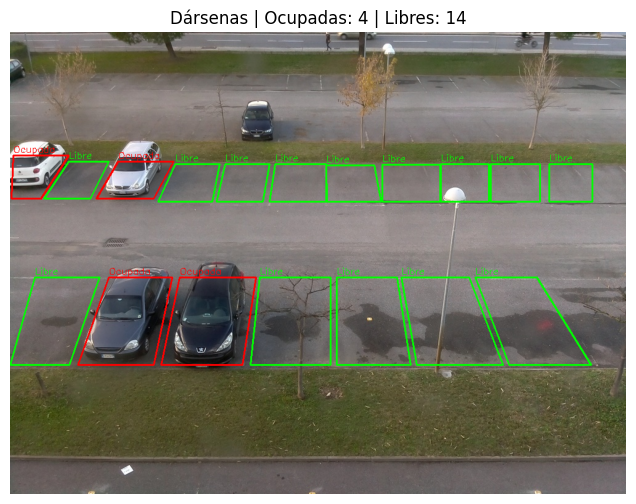

In [ ]:
#EN ESTE CODIGO ME GUARDO LOS VALORES DEL DESCRIPTOR DE TEXTURA DE LAS DARSENAS VACIAS, PARA LUEGO COMPARARLO

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops

estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0829.jpg') #VACIO

estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2GRAY)

vector_descriptores =[]
vector_valor =[]

#hago una ecualizacion del histograma
estacionamiento_eq = cv.equalizeHist(estacionamiento)

estacionamiento_eq = cv.medianBlur(estacionamiento_eq,5)
#------------------------empiezo con los descriptores de textura------------------------------------------------------------------------


darsenas = [
    ((5, 200),(95,200),(50, 270), (2,270)),
    ((95, 210), (160, 210), (130, 270), (55, 270)),
    ((175, 210),(265, 210), (233,270), (140, 270)),
    ((268, 214),(340, 214), (328,275), (240,275)),
     ((349, 214), (421, 214), (410, 275), (335, 275)),  # Dársena 5
    ((430, 214), (513, 214), (513, 275), (421, 275)),  # Dársena 6
    ((513, 216), (591, 216), (602, 275), (514, 275)),  # Dársena 7
    ((604, 215), (698, 215), (698, 275), (604, 275)),  # Dársena 8
    ((699, 214), (777, 214), (777, 275), (699, 275)),  # Dársena 9
    ((780, 214), (860, 214), (860, 275), (780, 275)),  # Dársena 10
    ((875, 214), (945, 214), (945, 275), (875, 275)),   # Dársena 11 #antes estaba (875, 204), (945, 270)

    #parte de abajo
    ((40, 398),(145, 398), (96,540), (0, 540)),
    ((160, 398), (263, 398), (233,540), (110, 540)),
    ((275,398), (399, 398), (377,540), (245, 540)),
    ((405, 398),(520, 398), (520, 540), (390, 540)),
    ((530, 398), (628, 398),(650, 540), (530, 540)),
    ((635, 398),(745, 398), (800, 540), (660, 540)),
    ((755, 398),(855, 398), (943, 540), (810, 540))

]


# Inicializar contadores
ocupadas = 0
libres = 0
resultado = estacionamiento_color.copy()


# Umbral de decision (ajustable)
umbral_ocupacion = 82 #PROBAR CON 120

for i, puntos in enumerate(darsenas):
    puntos_np = np.array(puntos, dtype=np.int32)

    # Crear máscara y recorte de la ROI
    mask = np.zeros_like(estacionamiento_eq, dtype=np.uint8)
    cv.fillPoly(mask, [puntos_np], 255)
    roi = cv.bitwise_and(estacionamiento_eq, estacionamiento_eq, mask=mask)

    # Recorte rectangular para pasarle a GLCM (mejora el rendimiento)
    x, y, w, h = cv.boundingRect(puntos_np)
    roi_crop = roi[y:y+h, x:x+w]
    roi_crop = cv.resize(roi_crop, (32, 32))  # Reducir tamaño para consistencia

    # Reducción de niveles de gris (de 256 a 8 niveles)
    roi_reducida = (roi_crop // 32).astype(np.uint8)

    # Calcular GLCM y homogeneidad
    glcm = graycomatrix(roi_reducida, distances=[1], angles=[0], levels=8, symmetric=True, normed=True)
    homogeneidad = graycoprops(glcm, 'homogeneity')[0, 0]



    valores = roi[mask == 255]
    media = np.mean(valores)
    s = np.std(valores)

    print(f"Dársena {i+1} → media: {media:.2f} | desvío: {s:.2f}")

       # Decisión: ocupada o libre
    if media < umbral_ocupacion:
        color = (255, 0, 0)  # Rojo (ocupada)
        ocupadas += 1
        estado = "Ocupada"
    else:
      if media >= 82 and media <= 90:
        #es porq es sombra, entonces va como libre
        color = (0, 255, 0)  # Verde (libre)
        libres += 1
        estado = "Libre"
        ocupadas -= 1
      else:
          if s > 64:
            color = (255, 0, 0)  # Rojo (ocupada)
            ocupadas += 1
            estado = "Ocupada"
          else:
              color = (0, 255, 0)  # Verde (libre)
              libres += 1
              estado = "Libre"

    #ACA ME GUARDO LOS VALORES DE HOMOGENEIDAD
    vector_descriptores.append(homogeneidad)
    #ME GUARDO TAMBIEN EL ESTADO
    if estado == 'Ocupada' :
      vector_valor.append(1)
    else:
      vector_valor.append(0)

    # Dibujar resultado
    cv.polylines(resultado, [puntos_np], isClosed=True, color=color, thickness=2)
    cv.putText(resultado, f'{estado}', (puntos[0][0], puntos[0][1] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    print(f"Dársena {i+1} → Homogeneidad: {homogeneidad:.3f} → {estado}")

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.imshow(resultado)
plt.title(f'Dársenas | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.show()


 POSICION 4 - DESCRIPTORES DE TEXTURA - COMPARACION

Homogeneidad a comparar 0.8240779260869394
Valor anterior de darsena 1
0.007665792525849424
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 1 → Homogeneidad: 0.832 → Libre
Homogeneidad a comparar 0.9008361005692602
Valor anterior de darsena 0
0.0341200189753319
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 2 → Homogeneidad: 0.935 → Ocupada
Homogeneidad a comparar 0.7867696592921924
Valor anterior de darsena 1
0.02910293230027572
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 3 → Homogeneidad: 0.816 → Libre
Homogeneidad a comparar 0.9035172784994892
Valor anterior de darsena 0
0.02509406054353891
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 4 → Homogeneidad: 0.878 → Ocupada
Homogeneidad a comparar 0.9169386768354983
Valor anterior de darsena 0
0.010565063494380467
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 5 → Homogeneidad: 0.928 → Ocupada
Homogeneidad a comparar 0.9208979528535982
Valor anterior de darsena 0
0.017079623412640244
ENTRA PORQ HAY DIFERENCIA GRANDE
Dársena 6 → Homogeneidad: 0.938 → Ocupada
Homoge

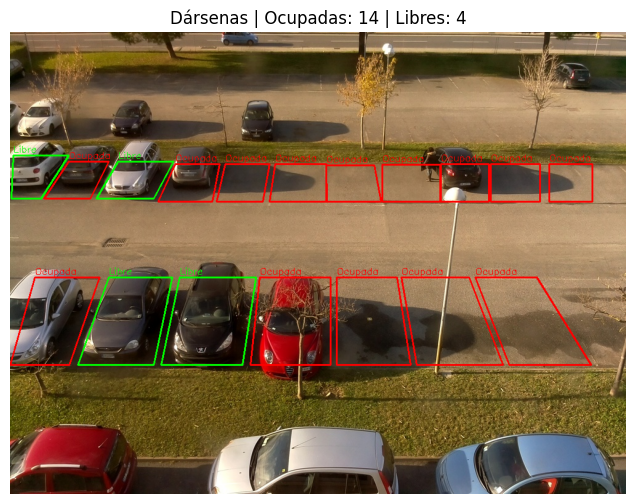

In [ ]:
#ACA VOY A COMPARAR LOS VALORES DE LAS DARSENAS QUE ESTAN OCUPADAS - O NO - CON LAS QUE TENGO GUARDADAS

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops

estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0930.jpg') #MEDIO LLENO
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_1001.jpg') #LLENO


estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2GRAY)


#hago una ecualizacion del histograma
estacionamiento_eq = cv.equalizeHist(estacionamiento)

estacionamiento_eq = cv.medianBlur(estacionamiento_eq,5)

#------------------------empiezo con los descriptores de textura------------------------------------------------------------------------


darsenas = [
    ((5, 200),(95,200),(50, 270), (2,270)),
    ((95, 210), (160, 210), (130, 270), (55, 270)),
    ((175, 210),(265, 210), (233,270), (140, 270)),
    ((268, 214),(340, 214), (328,275), (240,275)),
     ((349, 214), (421, 214), (410, 275), (335, 275)),  # Dársena 5
    ((430, 214), (513, 214), (513, 275), (421, 275)),  # Dársena 6
    ((513, 216), (591, 216), (602, 275), (514, 275)),  # Dársena 7
    ((604, 215), (698, 215), (698, 275), (604, 275)),  # Dársena 8
    ((699, 214), (777, 214), (777, 275), (699, 275)),  # Dársena 9
    ((780, 214), (860, 214), (860, 275), (780, 275)),  # Dársena 10
    ((875, 214), (945, 214), (945, 275), (875, 275)),   # Dársena 11 #antes estaba (875, 204), (945, 270)

    #parte de abajo
    ((40, 398),(145, 398), (96,540), (0, 540)),
    ((160, 398), (263, 398), (233,540), (110, 540)),
    ((275,398), (399, 398), (377,540), (245, 540)),
    ((405, 398),(520, 398), (520, 540), (390, 540)),
    ((530, 398), (628, 398),(650, 540), (530, 540)),
    ((635, 398),(745, 398), (800, 540), (660, 540)),
    ((755, 398),(855, 398), (943, 540), (810, 540))

]


# Inicializar contadores
ocupadas = 0
libres = 0
resultado = estacionamiento_color.copy()

# Umbral de homogeneidad (ajustable con prueba y error)
umbral_homogeneidad = 0.001

for i, puntos in enumerate(darsenas):
    puntos_np = np.array(puntos, dtype=np.int32)

    # Crear máscara y recorte de la ROI
    mask = np.zeros_like(estacionamiento_eq, dtype=np.uint8)
    cv.fillPoly(mask, [puntos_np], 255)
    roi = cv.bitwise_and(estacionamiento_eq, estacionamiento_eq, mask=mask)

    # Recorte rectangular para pasarle a GLCM (mejora el rendimiento)
    x, y, w, h = cv.boundingRect(puntos_np)
    roi_crop = roi[y:y+h, x:x+w]
    roi_crop = cv.resize(roi_crop, (32, 32))  # Reducir tamaño para consistencia

    # Reducción de niveles de gris (de 256 a 8 niveles)
    roi_reducida = (roi_crop // 32).astype(np.uint8)

    # Calcular GLCM y homogeneidad
    glcm = graycomatrix(roi_reducida, distances=[1], angles=[0], levels=8, symmetric=True, normed=True)
    homogeneidad = graycoprops(glcm, 'homogeneity')[0, 0]


    print(f'Homogeneidad a comparar {vector_descriptores[i]}')
    print(f'Valor anterior de darsena {vector_valor[i]}')

    print(abs(homogeneidad - vector_descriptores[i]))
    # Clasificación según homogeneidad
    if abs(homogeneidad - vector_descriptores[i]) > umbral_homogeneidad:
        print('ENTRA PORQ HAY DIFERENCIA GRANDE')
        #si estaba ocupado ahora esta libre porq hubo un cambio
        if vector_valor[i] == 1:
            estado = "Libre"
            color = (0, 255, 0)
            libres += 1
        else:
            estado = "Ocupada"
            color = (255, 0, 0)
            ocupadas += 1
    else:
      #si no hubo cambios hay que dejarlo como estaba
        if vector_valor[i] == 1:
            estado = "Ocupada"
            color = (255, 0, 0)
            ocupadas += 1
        else:
            estado = "Libre"
            color = (0, 255, 0)
            libres += 1

    # Dibujar resultado
    cv.polylines(resultado, [puntos_np], isClosed=True, color=color, thickness=2)
    cv.putText(resultado, f'{estado}', (puntos[0][0], puntos[0][1] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    print(f"Dársena {i+1} → Homogeneidad: {homogeneidad:.3f} → {estado}")

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.imshow(resultado)
plt.title(f'Dársenas | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.show()

# #IMPLEMENTACION 2 - POSICIÓN 2

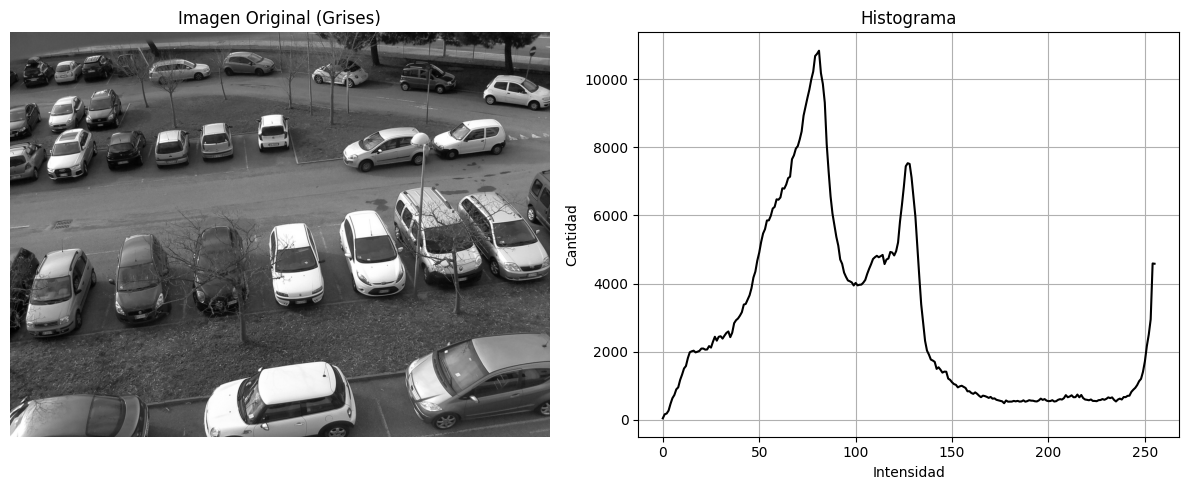

Dársena 1 → media: 103.30 | desvío: 83.15
Dársena 2 → media: 67.31 | desvío: 61.41
Dársena 3 → media: 84.83 | desvío: 57.13
Dársena 4 → media: 105.13 | desvío: 53.75
Dársena 5 → media: 128.69 | desvío: 65.56
Dársena 6 → media: 103.93 | desvío: 77.23
Dársena 7 → media: 87.18 | desvío: 59.28
Dársena 8 → media: 78.79 | desvío: 44.92
Dársena 9 → media: 154.17 | desvío: 78.77
Dársena 10 → media: 157.83 | desvío: 80.67
Dársena 11 → media: 113.89 | desvío: 84.64
Dársena 12 → media: 135.56 | desvío: 86.39


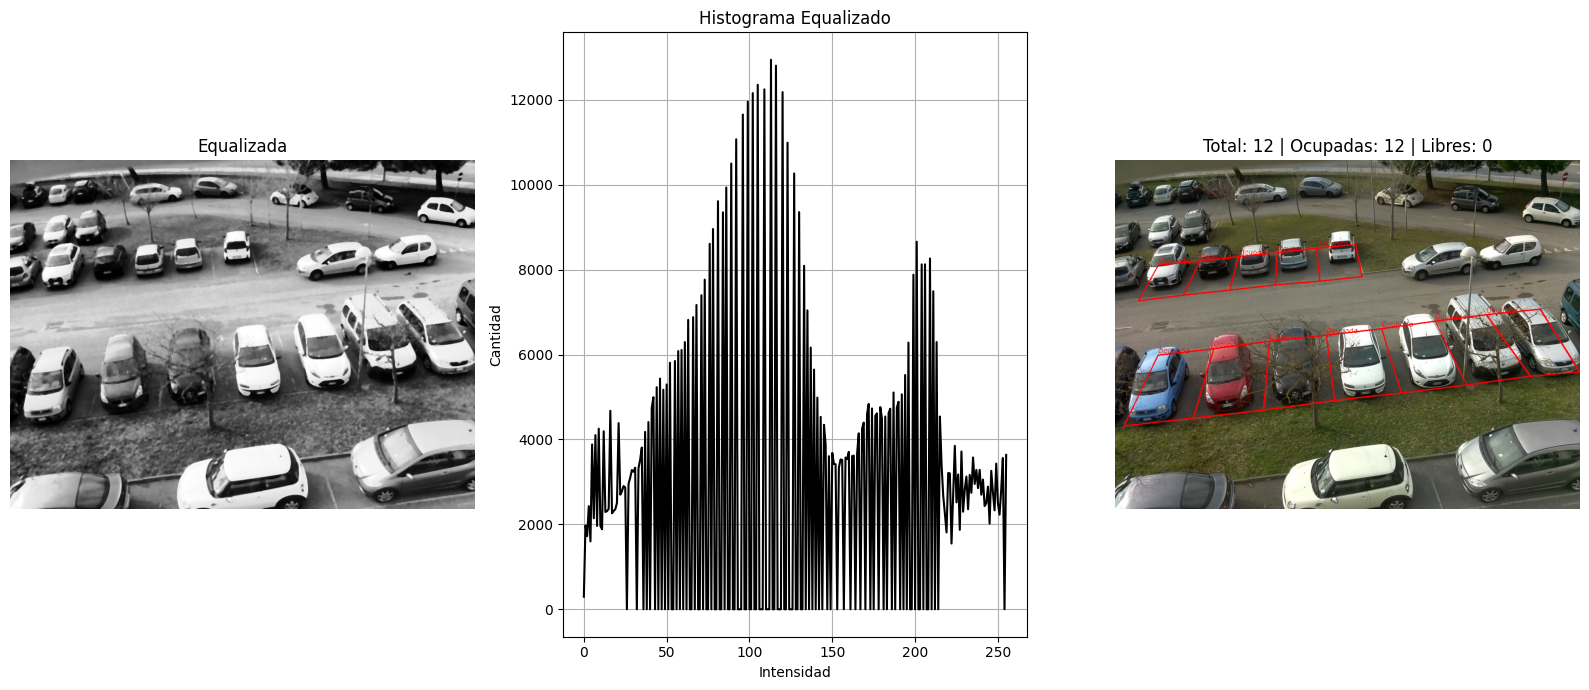

In [ ]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Leer imagen y convertir
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0805.jpg') # cuasi-vacia
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0905.jpg') # media-llena
estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_1205.jpg') # llena


estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_RGB2GRAY)

# Histograma original
histograma = cv.calcHist([estacionamiento], [0], None, [256], [0, 256])

# Mostrar imagen y su histograma
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(estacionamiento, cmap='gray')
plt.title('Imagen Original (Grises)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.plot(histograma, color='black')
plt.title('Histograma')
plt.xlabel('Intensidad')
plt.ylabel('Cantidad')
plt.grid(True)
plt.tight_layout()
plt.show()

# Equalización + filtro
estacionamiento_eq = cv.equalizeHist(estacionamiento)
estacionamiento_eq = cv.medianBlur(estacionamiento_eq, 5)

# Histograma equalizado
histograma_eq = cv.calcHist([estacionamiento_eq], [0], None, [256], [0, 256])

# DEFINICIÓN DE DÁRSENAS CON 4 PUNTOS
# Lista de dársenas correctamente agrupadas y ordenadas (en sentido horario)
darsenas = [
    # Dársenas
    [(93,225),(50,302,),(146,290),(182,217)], #1
    [(182,217),(146,290),(246,279),(266,207)],#2
    [(266,207),(246,279),(344,268),(349,199)],#3
    [(349,199),(344,268),(440,260),(433,189)],#4
    [(433,189),(440,260),(531,250),(517,181)],#5
    [(92,419),(19,571),(168,554),(212,405)],  #6
    [(212,405),(168,554),(319,537),(332,389)], #7
    [(332,389),(319,537),(472,516),(454,376)], #8
    [(454,376),(472,516),(615,500),(573,362)],  #9
    [(573,362),(615,500),(756,483),(688,346) ],  #10
    [(688,346),(756,483),(893,464),(798,332)],  #11
    [(798,332),(893,464),(999,455),(914,320)] #12
    ]



# Imagen para resultados
resultado = estacionamiento_color.copy()

# Parámetros
umbral_ocupacion = 110
ocupadas = 0
libres = 0

for i, darsena in enumerate(darsenas):
    # Crear máscara para el polígono
    mask = np.zeros(estacionamiento_eq.shape, dtype=np.uint8)
    pts = np.array([darsena], dtype=np.int32)
    cv.fillPoly(mask, pts, 255)

    # Aplicar máscara
    recorte = cv.bitwise_and(estacionamiento_eq, estacionamiento_eq, mask=mask)

    # Calcular estadísticas solo en zona útil
    valores = recorte[mask == 255]
    media = np.mean(valores)
    desvio = np.std(valores)

    print(f"Dársena {i+1} → media: {media:.2f} | desvío: {desvio:.2f}")

    # Clasificación
    if media < umbral_ocupacion:
        estado = "Ocupada"
        color = (255, 0, 0)
        ocupadas += 1
    else:
        if media >= 82 and media <= 95:
            estado = "Libre"  # sombra
            color = (0, 255, 0)
            libres += 1
        elif desvio > 55:
            estado = "Ocupada"
            color = (255, 0, 0)
            ocupadas += 1
        else:
            estado = "Libre"
            color = (0, 255, 0)
            libres += 1

    # Dibujar polígono y texto
    cv.polylines(resultado, [pts], isClosed=True, color=color, thickness=2)
    x_text, y_text = darsena[0]
    cv.putText(resultado, estado, (x_text, y_text - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

total = ocupadas + libres

# Mostrar resultados
plt.figure(figsize=(16, 7))
plt.subplot(1, 3, 1)
plt.imshow(estacionamiento_eq, cmap='gray')
plt.title('Equalizada')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.plot(histograma_eq, color='black')
plt.title('Histograma Equalizado')
plt.xlabel('Intensidad')
plt.ylabel('Cantidad')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.imshow(resultado)
plt.title(f'Total: {total} | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.tight_layout()
plt.show()


IMPLEMENTACIÓN 2 - POSICION 4 - GLSM

In [ ]:
# Instalar scikit-image si no está instalado
!pip install scikit-image

import cv2
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt # Ensure matplotlib is imported for plotting

# Leer imagen y convertir
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0805.jpg') # cuasi-vacia
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0905.jpg') # media-llena
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_1205.jpg') # llena

# Cargar imagen (gris)
imagen = cv2.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0805.jpg', cv2.IMREAD_GRAYSCALE)

# Lista de dársenas (4 puntos por dársena, sentido horario)
darsenas = [
    [(93,225),(50,302),(146,290),(182,217)],
    [(182,217),(146,290),(246,279),(266,207)],
    [(266,207),(246,279),(344,268),(349,199)],
    [(349,199),(344,268),(440,260),(433,189)],
    [(433,189),(440,260),(531,250),(517,181)],
    [(92,419),(19,571),(168,554),(212,405)],
    [(212,405),(168,554),(319,537),(332,389)],
    [(332,389),(319,537),(472,516),(454,376)],
    [(454,376),(472,516),(615,500),(573,362)],
    [(573,362),(615,500),(756,483),(688,346)],
    [(688,346),(756,483),(893,464),(798,332)],
    [(798,332),(893,464),(999,455),(914,320)]
]

# Función para transformar la dársena a vista frontal
def extraer_region_rectificada(imagen, puntos, ancho=80, alto=160):
    pts_src = np.float32(puntos)
    pts_dst = np.float32([[0, 0], [ancho-1, 0], [ancho-1, alto-1], [0, alto-1]])
    matriz = cv2.getPerspectiveTransform(pts_src, pts_dst)
    rectificada = cv2.warpPerspective(imagen, matriz, (ancho, alto))
    return rectificada

# Función para aplicar GLCM y extraer características
def analizar_textura_glcm(roi):
    # Asegurarse de que la ROI no esté vacía antes de cuantizar
    if roi.size == 0:
        # Devuelve valores predeterminados o maneja el caso de ROI vacía
        return 0.0, 0.0, 0.0, 0.0

    # Reducir niveles de gris (8 niveles). Asegúrate de que los valores sean válidos.
    # clamped_roi = np.clip(roi, 0, 255) # Opcional: asegurar rango 0-255
    roi = (roi / 32).astype(np.uint8)  # Reducir niveles de gris (8 niveles)

    # Asegurarse de que la ROI tenga un tamaño mínimo para GLCM
    if roi.shape[0] < 2 or roi.shape[1] < 2:
         # GLCM requiere al menos 2x2 vecinos
         return 0.0, 0.0, 0.0, 0.0

    # GLCM necesita que la imagen sea int
    glcm = graycomatrix(roi, distances=[1], angles=[0], levels=8, symmetric=True, normed=True)

    contraste = graycoprops(glcm, 'contrast')[0, 0]
    homogeneidad = graycoprops(glcm, 'homogeneity')[0, 0]
    energia = graycoprops(glcm, 'energy')[0, 0]
    # Evitar log(0) en la entropía
    glcm_no_zeros = glcm[glcm > 0]
    entropia = -np.sum(glcm_no_zeros * np.log2(glcm_no_zeros))
    return contraste, homogeneidad, energia, entropia

# Procesar todas las dársenas
for i, puntos in enumerate(darsenas):
    roi = extraer_region_rectificada(imagen, puntos)
    contraste, homogeneidad, energia, entropia = analizar_textura_glcm(roi)

    print(f"Dársena {i+1}:")
    print(f" - Contraste: {contraste:.4f}")
    print(f" - Homogeneidad: {homogeneidad:.4f}")
    print(f" - Energía: {energia:.4f}")
    print(f" - Entropía: {entropia:.4f}\n")


Dársena 1:
 - Contraste: 0.0252
 - Homogeneidad: 0.9874
 - Energía: 0.9357
 - Entropía: 0.4411

Dársena 2:
 - Contraste: 0.0297
 - Homogeneidad: 0.9853
 - Energía: 0.9121
 - Entropía: 0.5724

Dársena 3:
 - Contraste: 0.0347
 - Homogeneidad: 0.9827
 - Energía: 0.9297
 - Entropía: 0.4885

Dársena 4:
 - Contraste: 0.1164
 - Homogeneidad: 0.9431
 - Energía: 0.7567
 - Entropía: 1.2451

Dársena 5:
 - Contraste: 0.3980
 - Homogeneidad: 0.8987
 - Energía: 0.5041
 - Entropía: 3.0618

Dársena 6:
 - Contraste: 0.0843
 - Homogeneidad: 0.9597
 - Energía: 0.8725
 - Entropía: 0.9008

Dársena 7:
 - Contraste: 0.1922
 - Homogeneidad: 0.9099
 - Energía: 0.7391
 - Entropía: 1.4978

Dársena 8:
 - Contraste: 0.3072
 - Homogeneidad: 0.8578
 - Energía: 0.5700
 - Entropía: 2.2848

Dársena 9:
 - Contraste: 0.2083
 - Homogeneidad: 0.8999
 - Energía: 0.6876
 - Entropía: 1.7913

Dársena 10:
 - Contraste: 0.1529
 - Homogeneidad: 0.9237
 - Energía: 0.7108
 - Entropía: 1.6156

Dársena 11:
 - Contraste: 0.2748
 - Hom

Dársena 1 → Homogeneidad: 0.930 → Libre
Dársena 2 → Homogeneidad: 0.928 → Libre
Dársena 3 → Homogeneidad: 0.929 → Libre
Dársena 4 → Homogeneidad: 0.881 → Libre
Dársena 5 → Homogeneidad: 0.821 → Ocupada
Dársena 6 → Homogeneidad: 0.909 → Libre
Dársena 7 → Homogeneidad: 0.873 → Libre
Dársena 8 → Homogeneidad: 0.806 → Ocupada
Dársena 9 → Homogeneidad: 0.864 → Libre
Dársena 10 → Homogeneidad: 0.882 → Libre
Dársena 11 → Homogeneidad: 0.836 → Ocupada
Dársena 12 → Homogeneidad: 0.878 → Libre


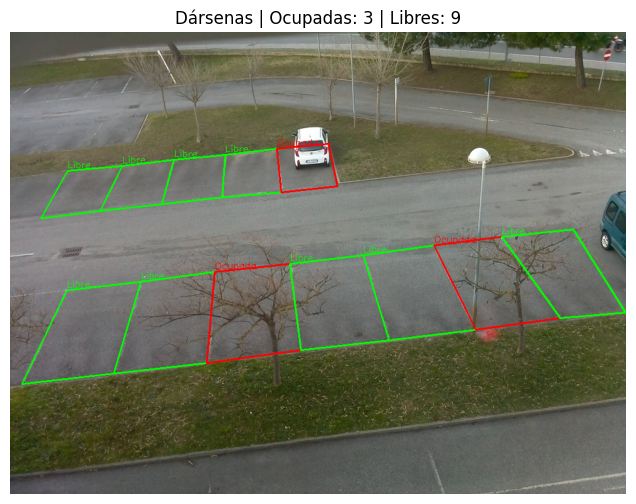

In [ ]:
import cv2 as cv
import numpy as np
from skimage.feature import graycomatrix, graycoprops
import matplotlib.pyplot as plt

# Leer imagen y convertir a escala de grises
#img_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0805.jpg')  #casi-vacia
#img_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_0905.jpg') # media-llena
img_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 2/2016-01-18_1205.jpg') # llena
img_color = cv.cvtColor(img_color, cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_color, cv.COLOR_RGB2GRAY)

# Lista de dársenas con 4 puntos cada una
darsenas = [
    [(93,225),(50,302),(146,290),(182,217)], #1
    [(182,217),(146,290),(246,279),(266,207)],#2
    [(266,207),(246,279),(344,268),(349,199)],#3
    [(349,199),(344,268),(440,260),(433,189)],#4
    [(433,189),(440,260),(531,250),(517,181)],#5
    [(92,419),(19,571),(168,554),(212,405)],  #6
    [(212,405),(168,554),(319,537),(332,389)], #7
    [(332,389),(319,537),(472,516),(454,376)], #8
    [(454,376),(472,516),(615,500),(573,362)],  #9
    [(573,362),(615,500),(756,483),(688,346)],  #10
    [(688,346),(756,483),(893,464),(798,332)],  #11
    [(798,332),(893,464),(999,455),(914,320)]   #12
]

# Inicializar contadores
ocupadas = 0
libres = 0
resultado = img_color.copy()

# Umbral de homogeneidad (ajustable con prueba y error)
umbral_homogeneidad = 0.85

for i, puntos in enumerate(darsenas):
    puntos_np = np.array(puntos, dtype=np.int32)

    # Crear máscara y recorte de la ROI
    mask = np.zeros_like(img_gray, dtype=np.uint8)
    cv.fillPoly(mask, [puntos_np], 255)
    roi = cv.bitwise_and(img_gray, img_gray, mask=mask)

    # Recorte rectangular para pasarle a GLCM (mejora el rendimiento)
    x, y, w, h = cv.boundingRect(puntos_np)
    roi_crop = roi[y:y+h, x:x+w]
    roi_crop = cv.resize(roi_crop, (32, 32))  # Reducir tamaño para consistencia

    # Reducción de niveles de gris (de 256 a 8 niveles)
    roi_reducida = (roi_crop // 32).astype(np.uint8)

    # Calcular GLCM y homogeneidad
    glcm = graycomatrix(roi_reducida, distances=[1], angles=[0], levels=8, symmetric=True, normed=True)
    homogeneidad = graycoprops(glcm, 'homogeneity')[0, 0]

    # Clasificación según homogeneidad
    if homogeneidad < umbral_homogeneidad:
        estado = "Ocupada"
        color = (255, 0, 0)
        ocupadas += 1
    else:
        estado = "Libre"
        color = (0, 255, 0)
        libres += 1

    # Dibujar resultado
    cv.polylines(resultado, [puntos_np], isClosed=True, color=color, thickness=2)
    cv.putText(resultado, f'{estado}', (puntos[0][0], puntos[0][1] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    print(f"Dársena {i+1} → Homogeneidad: {homogeneidad:.3f} → {estado}")

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.imshow(resultado)
plt.title(f'Dársenas | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.show()

#IMPLEMENTACION FINAL TEXTURA - POSICION 4

Dársena 1 → Homogeneidad: 0.803 → Ocupada
Dársena 2 → Homogeneidad: 0.896 → Libre
Dársena 3 → Homogeneidad: 0.771 → Ocupada
Dársena 4 → Homogeneidad: 0.898 → Libre
Dársena 5 → Homogeneidad: 0.910 → Libre
Dársena 6 → Homogeneidad: 0.906 → Libre
Dársena 7 → Homogeneidad: 0.878 → Libre
Dársena 8 → Homogeneidad: 0.923 → Libre
Dársena 9 → Homogeneidad: 0.943 → Libre
Dársena 10 → Homogeneidad: 0.952 → Libre
Dársena 11 → Homogeneidad: 0.952 → Libre
Dársena 12 → Homogeneidad: 0.882 → Libre
Dársena 13 → Homogeneidad: 0.813 → Ocupada
Dársena 14 → Homogeneidad: 0.830 → Ocupada
Dársena 15 → Homogeneidad: 0.817 → Ocupada
Dársena 16 → Homogeneidad: 0.849 → Ocupada
Dársena 17 → Homogeneidad: 0.825 → Ocupada
Dársena 18 → Homogeneidad: 0.878 → Libre


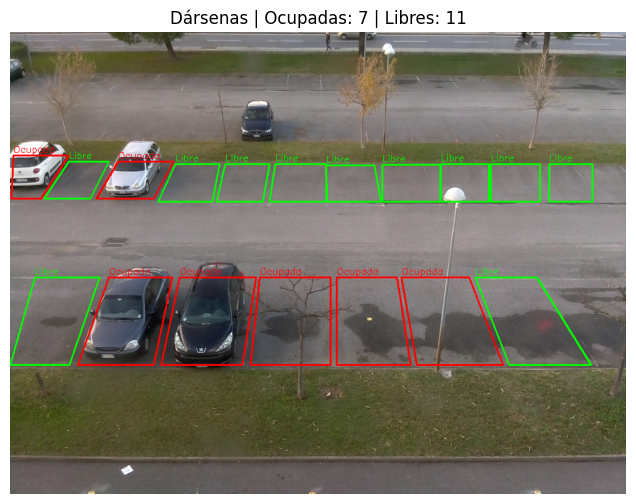

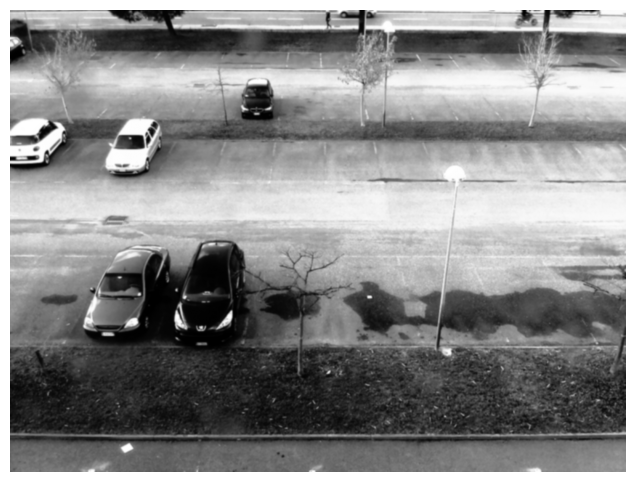

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import graycomatrix, graycoprops

estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0829.jpg') #VACIO umbral_ocupacion = 0.86
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_0930.jpg') #MEDIO LLENO umbral_homogeneidad = 0.89
#estacionamiento_color = cv.imread('/content/drive/MyDrive/PDI - TP FINAL/ImagenesTP/Posicion 4/2015-11-27_1001.jpg') #LLENO umbral_homogeneidad 0.92


estacionamiento_color = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2RGB)
estacionamiento = cv.cvtColor(estacionamiento_color, cv.COLOR_BGR2GRAY)


#hago una ecualizacion del histograma
estacionamiento_eq = cv.equalizeHist(estacionamiento)
#estacionamiento_eq = cv.medianBlur(estacionamiento_eq, 7)
estacionamiento_eq = cv.GaussianBlur(estacionamiento_eq, (5, 5), 0)

#------------------------empiezo con los descriptores de textura------------------------------------------------------------------------


darsenas = [
    ((5, 200),(95,200),(50, 270), (2,270)),
    ((95, 210), (160, 210), (130, 270), (55, 270)),
    ((175, 210),(265, 210), (233,270), (140, 270)),
    ((268, 214),(340, 214), (328,275), (240,275)),
     ((349, 214), (421, 214), (410, 275), (335, 275)),  # Dársena 5
    ((430, 214), (513, 214), (513, 275), (421, 275)),  # Dársena 6
    ((513, 216), (591, 216), (602, 275), (514, 275)),  # Dársena 7
    ((604, 215), (698, 215), (698, 275), (604, 275)),  # Dársena 8
    ((699, 214), (777, 214), (777, 275), (699, 275)),  # Dársena 9
    ((780, 214), (860, 214), (860, 275), (780, 275)),  # Dársena 10
    ((875, 214), (945, 214), (945, 275), (875, 275)),   # Dársena 11 #antes estaba (875, 204), (945, 270)

    #parte de abajo
    ((40, 398),(145, 398), (96,540), (0, 540)),
    ((160, 398), (263, 398), (233,540), (110, 540)),
    ((275,398), (399, 398), (377,540), (245, 540)),
    ((405, 398),(520, 398), (520, 540), (390, 540)),
    ((530, 398), (628, 398),(650, 540), (530, 540)),
    ((635, 398),(745, 398), (800, 540), (660, 540)),
    ((755, 398),(855, 398), (943, 540), (810, 540))

]


# Inicializar contadores
ocupadas = 0
libres = 0
resultado = estacionamiento_color.copy()

# Umbral de homogeneidad (ajustable con prueba y error)
umbral_homogeneidad = 0.86

for i, puntos in enumerate(darsenas):
    puntos_np = np.array(puntos, dtype=np.int32)

    # Crear máscara y recorte de la ROI
    mask = np.zeros_like(estacionamiento_eq, dtype=np.uint8)
    cv.fillPoly(mask, [puntos_np], 255)
    roi = cv.bitwise_and(estacionamiento_eq, estacionamiento_eq, mask=mask)

    # Recorte rectangular para pasarle a GLCM (mejora el rendimiento)
    x, y, w, h = cv.boundingRect(puntos_np)
    roi_crop = roi[y:y+h, x:x+w]
    roi_crop = cv.resize(roi_crop, (32, 32))  # Reducir tamaño para consistencia

    # Reducción de niveles de gris (de 256 a 8 niveles)
    roi_reducida = (roi_crop // 32).astype(np.uint8)

    # Calcular GLCM y homogeneidad
    glcm = graycomatrix(roi_reducida, distances=[1], angles=[0], levels=8, symmetric=True, normed=True)
    homogeneidad = graycoprops(glcm, 'homogeneity')[0, 0]

    # Clasificación según homogeneidad
    if homogeneidad < umbral_homogeneidad:
        estado = "Ocupada"
        color = (255, 0, 0)
        ocupadas += 1
    else:
        estado = "Libre"
        color = (0, 255, 0)
        libres += 1

    # Dibujar resultado
    cv.polylines(resultado, [puntos_np], isClosed=True, color=color, thickness=2)
    cv.putText(resultado, f'{estado}', (puntos[0][0], puntos[0][1] - 5), cv.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)
    print(f"Dársena {i+1} → Homogeneidad: {homogeneidad:.3f} → {estado}")

# Mostrar resultados
plt.figure(figsize=(12, 6))
plt.imshow(resultado)
plt.title(f'Dársenas | Ocupadas: {ocupadas} | Libres: {libres}')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 6))
plt.imshow(estacionamiento_eq, cmap='gray')
plt.axis('off')
plt.show()